In [1]:
import io
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
from matplotlib import pyplot as plt

In [2]:
def get_corona_data():
    url="https://www.worldometers.info/coronavirus/"
    html_file = requests.get(url).text
    soup = BeautifulSoup(html_file, "lxml")
    table = soup.find("table", id = "main_table_countries_today")
    data = table.tbody.find_all("tr")

    dicts = {}
    for i in range(len(data)):
        try:
            key = (data[i].find_all('a', href=True)[0].string)
        except:
            key = (data[i].find_all('td')[0].string)

        value = [j.string for j in data[i].find_all('td')]
        dicts[key] = value
    live_data= pd.DataFrame(dicts).drop(0).T.iloc[:,:8]
    live_data.columns = ["Total Cases","New Cases", "Total Deaths", "New Deaths", "Total Recovered","Active","Serious Critical", "Tot Cases/1M pop"]
    live_data.index.name = 'Country'
    live_data.iloc[:,:5].to_csv("full_data.csv")

In [3]:
get_corona_data()

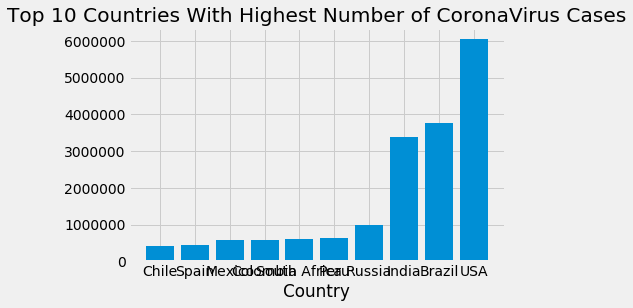

In [4]:
datafile=open('full_data.csv')
data=csv.reader(datafile)
data=list(data)
countries=[]
cases=[]
i=2
while(i<12):
    country=data[i][1]
    countries.append(country)
    case_count=data[i][2]
    case_count=case_count.replace(',','')
    case_count=int(case_count)
    cases.append(case_count)
    i=i+1
cases.sort()
countries.reverse()
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.bar(countries,cases)
plt.xlabel('Country')
plt.title('Top 10 Countries With Highest Number of CoronaVirus Cases')
plt.show()